In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mission Statement

## Business Objective
The bike-sharing company aims to enhance its revenue by engaging with "casual" riders. To achieve this, a comprehensive analysis of user behavior differences between "casual" riders (who pay for each ride) and annual members (who subscribe yearly) is required. The goal is to identify key distinctions that will enable the creation of a targeted and effective marketing message, ultimately encouraging "casual" users to transition to the annual subscription model.

## Key Objectives

1. **Identify the Business Task:**
   - Analyze the disparities between "casual" and annual users to formulate a focused marketing campaign aimed at persuading "casual" users to switch to the annual subscription.

2. **Consider Key Stakeholders:**
   - The primary stakeholders include the Director of Marketing, Manager Lily Moreno, the Marketing Analytics Team, and the Cyclistic Executive Team.
   
3. **Define the Business Task:**
   - The business task revolves around exploring behavioral differences between the two user types to develop a targeted marketing strategy. The overarching question is:
     - "What factors could motivate 'casual' users to transition to an annual subscription based on their behavior?"


## Data Credibility

### Source and Period
The dataset is derived from public records of a bike-sharing company, covering the timeline from 2013 to November 2023. File organization lacks a consistent naming convention, varying between quarters, months, or the entire year. Column names also exhibit inconsistency, with some added or removed over the years. Despite these variations, the data appears well-maintained, originating directly from the company, boasting a substantial volume of entries and valuable information.

### Focus on 2022-2023
For the purpose of our analysis, emphasis will be placed on the 2022-2023 period. This timeframe is deemed most pertinent to the business task, offering comprehensive data inclusive of geo-location coordinates and details regarding the types of bikes utilized.

In [2]:
# Load all the data to their respective variables
tripdata_2022_11 = pd.read_csv("CSV/202211-divvy-tripdata.csv")
tripdata_2022_12 = pd.read_csv("CSV/202212-divvy-tripdata.csv")
tripdata_2023_01 = pd.read_csv("CSV/202301-divvy-tripdata.csv")
tripdata_2023_02 = pd.read_csv("CSV/202302-divvy-tripdata.csv")
tripdata_2023_03 = pd.read_csv("CSV/202303-divvy-tripdata.csv")
tripdata_2023_04 = pd.read_csv("CSV/202304-divvy-tripdata.csv")
tripdata_2023_05 = pd.read_csv("CSV/202305-divvy-tripdata.csv")
tripdata_2023_06 = pd.read_csv("CSV/202306-divvy-tripdata.csv")
tripdata_2023_07 = pd.read_csv("CSV/202307-divvy-tripdata.csv")
tripdata_2023_08 = pd.read_csv("CSV/202308-divvy-tripdata.csv")
tripdata_2023_09 = pd.read_csv("CSV/202309-divvy-tripdata.csv")
tripdata_2023_10 = pd.read_csv("CSV/202310-divvy-tripdata.csv")
stations_1 = pd.read_csv('CSV/Divvy_Stations_2014-Q1Q2.csv')
stations_2 = pd.read_csv('CSV/Divvy_Stations_2014-Q3Q4.csv')

In [3]:
# Join all the trip data together
tripdata = pd.concat([tripdata_2022_11,
tripdata_2022_12,
tripdata_2023_01,
tripdata_2023_02,
tripdata_2023_03,
tripdata_2023_04,
tripdata_2023_05,
tripdata_2023_06,
tripdata_2023_07,
tripdata_2023_08,
tripdata_2023_09,
tripdata_2023_10])

tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member


## Station Information
In addition to the tripdata dataset, we have supplementary data pertaining to all established bike stations. This dataset provides comprehensive details about each station's attributes. The intention is to leverage this station data to address and fill any null values present in our tripdata dataset.

In [4]:
stations = pd.concat([stations_1,stations_2]).sort_values('id').drop_duplicates(subset='id', keep='first').reset_index(drop=True)
stations

,id,name,latitude,longitude,dpcapacity,online date,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,18/06/13,NaN
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,NaN,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,20/06/13,NaN
3,15,Racine Ave & 18th St,41.858181,-87.656487,15,20/06/13,NaN
4,16,Wood St & North Ave,41.910329,-87.672516,15,NaN,6/22/2013 18:55
...,...,...,...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700,15,NaN,10/4/2013 16:06
296,348,California Ave & 21st St,41.854016,-87.695445,15,NaN,10/9/2013 16:13
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077,15,28/10/13,NaN
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747,15,22/10/13,NaN


In [5]:
stations = stations.drop(['dpcapacity', 'online date', 'dateCreated'], axis=1)
stations = stations.drop_duplicates(subset='id', keep='first').sort_values('id').reset_index(drop=True)
stations.head()

,id,name,latitude,longitude
0,5,State St & Harrison St,41.873958,-87.627739
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681
2,14,Morgan St & 18th St,41.858086,-87.651073
3,15,Racine Ave & 18th St,41.858181,-87.656487
4,16,Wood St & North Ave,41.910329,-87.672516


## Data Cleaning and Preparation

### Data Integrity Enhancement
Now that our consolidated dataset is ready, our next step involves meticulous cleaning to rectify potential discrepancies, particularly handling missing values marked as NA. This process ensures the integrity of our dataset.

### Feature Engineering
To optimize our analytical efforts and extract more meaningful insights, we will introduce additional columns. These new columns will be derived through calculated values based on existing columns. This strategic augmentation aims to facilitate a more comprehensive and insightful analysis.

In [6]:
# Looking at the amount of NA values
tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    866243
start_station_id      866375
end_station_name      918796
end_station_id        918937
start_lat                  0
start_lng                  0
end_lat                 6759
end_lng                 6759
member_casual              0
dtype: int64

In [7]:
# Lets see how the rows with no station names look like
tripdata[tripdata['start_station_name'].isna()].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
185,6E2AD8D07257896C,electric_bike,2022-11-22 21:29:44,2022-11-22 21:36:53,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.93,-87.69,41.920771,-87.663712,member
186,C3FD26A31CC2C211,electric_bike,2022-11-01 13:38:57,2022-11-01 13:46:25,NaN,NaN,State St & Kinzie St,13050,41.90,-87.64,41.889375,-87.627077,member
187,AFA3E051224EFF7A,electric_bike,2022-11-21 20:13:19,2022-11-21 20:15:03,NaN,NaN,Southport Ave & Clybourn Ave,TA1309000030,41.92,-87.66,41.920771,-87.663712,member
188,5A30C23385E249F1,electric_bike,2022-11-09 21:36:04,2022-11-09 21:40:33,NaN,NaN,Racine Ave & Washington Blvd,654,41.88,-87.67,41.883073,-87.656952,member
189,2B096F11BFFAEEF4,electric_bike,2022-11-25 10:47:39,2022-11-25 10:48:05,NaN,NaN,Ashland Ave & Lake St,13073,41.89,-87.67,41.885920,-87.667170,member


Upon closer examination, certain rows exhibit missing station names and IDs, although latitude and longitude values are available. To rectify this, we will employ a strategic approach. By leveraging the provided latitude and longitude values, we can merge this subset of data with the comprehensive station dataset. This merging process will facilitate the filling of the missing station information, contributing to a more complete and robust dataset.


In [8]:
# For 'start_station_name'

# Merge tripdata with stations based on latitude and longitude
merged_data = pd.merge(tripdata, stations, how='left', left_on=['start_lat', 'start_lng'], right_on=['latitude', 'longitude'])

# Update the missing values in tripdata with values from stations
tripdata['start_station_name'].fillna(merged_data['name'], inplace=True)
tripdata['start_station_id'].fillna(merged_data['id'], inplace=True)

# Delete merged_data df
del merged_data
tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    743278
start_station_id      743391
end_station_name      918796
end_station_id        918937
start_lat                  0
start_lng                  0
end_lat                 6759
end_lng                 6759
member_casual              0
dtype: int64

In [9]:
# For 'end_station_name'

# Merge tripdata with stations based on latitude and longitude
merged_data = pd.merge(tripdata, stations, how='left', left_on=['end_lat', 'end_lng'], right_on=['latitude', 'longitude'])

# Update the missing values in tripdata with values from stations
tripdata['end_station_name'].fillna(merged_data['name'], inplace=True)
tripdata['end_station_id'].fillna(merged_data['id'], inplace=True)

# Delete merged_data df
del merged_data
tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    743278
start_station_id      743391
end_station_name      688656
end_station_id        688756
start_lat                  0
start_lng                  0
end_lat                 6759
end_lng                 6759
member_casual              0
dtype: int64

A parallel scenario has been identified concerning missing 'end_lat' and 'end_lng' values. Leveraging the available 'end_station_name' information, we can strategically fill in these missing coordinates.

In [10]:
# Merge tripdata with stations based on end_station_name
merged_data = pd.merge(tripdata, stations, how='left', left_on='end_station_name', right_on='name')

# Update the missing values in tripdata with values from stations
tripdata['end_lat'].fillna(merged_data['latitude'], inplace=True)
tripdata['end_lng'].fillna(merged_data['longitude'], inplace=True)

# Delete merged_data df
del merged_data
tripdata.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    743278
start_station_id      743391
end_station_name      688656
end_station_id        688756
start_lat                  0
start_lng                  0
end_lat                 3319
end_lng                 3319
member_casual              0
dtype: int64

In [11]:
# Droping NAs

tripdata_with_na = tripdata
tripdata = tripdata.dropna().reset_index(drop=True)
tripdata.shape

(4488782, 13)


#### Date Segmentation
To enhance our temporal analysis, we will create new columns to dissect the dates. This includes extracting the day of the month (`dd`), the numerical representation of the month (`month`), and the year (`year`). Additionally, we will determine the day of the week (`day`).

#### Ride Metrics
- `ride_length`
  - Definition: The duration of the ride in seconds.
  - Implementation: Calculated based on the start and end timestamps.

- `ride_distance`
  - Definition: The distance covered by the customer during the ride in kilometers.
  - Implementation: Utilizing available data on the geographical coordinates.

- `ride_speed`
  - Definition: The speed at which the customer traveled during the ride in kilometers per hour.
  - Implementation: Derived from the ride distance and duration.

In [12]:
# convert start_at and ended_at to datetime
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'])
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'])

# Create new columns for month, day, year, and day of the week
tripdata['dd'] = tripdata['started_at'].dt.strftime('%d')      #used dd because we already have date as a column name
tripdata['month'] = tripdata['started_at'].dt.strftime('%m')
tripdata['year'] = tripdata['started_at'].dt.strftime('%Y')
tripdata['day'] = tripdata['started_at'].dt.strftime('%A')
tripdata.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dd,month,year,day
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,10,11,2022,Thursday
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,04,11,2022,Friday


In [13]:
from geopy.distance import geodesic

# Create new columns for ride length, ride distance, and ride speed

# Duration of each ride
tripdata['ride_length'] = tripdata['ended_at'] - tripdata['started_at']

In [14]:
# Define a function to calculate distance for a batch of rows
def calculate_distance_batch(batch):
    return batch.apply(lambda row: geodesic((row['start_lat'], row['start_lng']), (row['end_lat'], row['end_lng'])).kilometers, axis=1)

# Define the batch size
batch_size = 150000

# Calculate the number of batches
num_batches = len(tripdata) // batch_size + 1

# Process data in batches
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(tripdata))
    
    batch_data = tripdata.iloc[start_index:end_index]
    tripdata.loc[start_index:end_index, 'ride_distance'] = calculate_distance_batch(batch_data)

In [15]:
# Calculate the average speed of each ride in km/hr
tripdata['ride_speed'] = tripdata['ride_distance'] / (tripdata['ride_length'].dt.total_seconds() / 3600)
tripdata.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dd,month,year,day,ride_length,ride_distance,ride_speed
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,10,11,2022,Thursday,0 days 00:09:32,2.181162,13.727591
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,04,11,2022,Friday,0 days 00:14:30,2.196554,9.089188


In [16]:
# Filter cases of Divvy getting cycles for maintenance or ride_length is negetive 
tripdata = tripdata[~((tripdata['start_station_name'] == 'HQ QR') | (tripdata['ride_length'] < pd.Timedelta(0)))].reset_index(drop=True)
tripdata

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dd,month,year,day,ride_length,ride_distance,ride_speed
0,BCC66FC6FAB27CC7,electric_bike,2022-11-10 06:21:55,2022-11-10 06:31:27,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879401,-87.639848,41.894345,-87.622798,member,10,11,2022,Thursday,0 days 00:09:32,2.181162,13.727591
1,772AB67E902C180F,classic_bike,2022-11-04 07:31:55,2022-11-04 07:46:25,Canal St & Adams St,13011,St. Clair St & Erie St,13016,41.879255,-87.639904,41.894345,-87.622798,member,04,11,2022,Friday,0 days 00:14:30,2.196554,9.089188
2,585EAD07FDEC0152,classic_bike,2022-11-21 17:20:29,2022-11-21 17:34:36,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,21,11,2022,Monday,0 days 00:14:07,2.938689,12.490296
3,91C4E7ED3C262FF9,classic_bike,2022-11-25 17:29:34,2022-11-25 17:45:15,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,25,11,2022,Friday,0 days 00:15:41,2.938689,11.242594
4,709206A3104CABC8,classic_bike,2022-11-29 17:24:25,2022-11-29 17:42:51,Indiana Ave & Roosevelt Rd,SL-005,St. Clair St & Erie St,13016,41.867888,-87.623041,41.894345,-87.622798,member,29,11,2022,Tuesday,0 days 00:18:26,2.938689,9.565353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488691,CB82F1F5D0505469,classic_bike,2023-10-30 07:35:46,2023-10-30 07:49:30,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,41.891847,-87.620580,member,30,10,2023,Monday,0 days 00:13:44,1.950582,8.521962
4488692,E2C362589E4AD3A9,classic_bike,2023-10-10 06:29:55,2023-10-10 06:45:19,Clark St & Lincoln Ave,13179,Fairbanks Ct & Grand Ave,TA1305000003,41.915689,-87.634600,41.891847,-87.620580,member,10,10,2023,Tuesday,0 days 00:15:24,2.892373,11.268987
4488693,965D4156EDECF21A,classic_bike,2023-10-26 06:26:23,2023-10-26 06:39:43,Clinton St & Washington Blvd,WL-012,Fairbanks Ct & Grand Ave,TA1305000003,41.883380,-87.641170,41.891847,-87.620580,member,26,10,2023,Thursday,0 days 00:13:20,1.950582,8.777621
4488694,0919ED32225E4D31,classic_bike,2023-10-09 08:47:29,2023-10-09 08:47:33,Michigan Ave & 14th St,TA1307000124,Michigan Ave & 14th St,TA1307000124,41.864059,-87.623727,41.864059,-87.623727,member,09,10,2023,Monday,0 days 00:00:04,0.000000,0.000000


## Analysis

#### Average Distance and Time for User Types
The initial phase of our analysis involves computing the average distance and time (in seconds) for both casual and member type users.

In [17]:
# Calculate the average distance and time for both casual and member type users
user_type_means = tripdata.groupby('member_casual').agg(mean_time=('ride_length', 'mean'), mean_distance=('ride_distance', 'mean')).reset_index()
user_type_means['mean_time'] = user_type_means['mean_time'].dt.total_seconds()   # timedelta to seconds
user_type_means

,member_casual,mean_time,mean_distance
0,casual,1501.227418,2.136898
1,member,732.359269,2.070012


#### Mean Travel Time by User Type

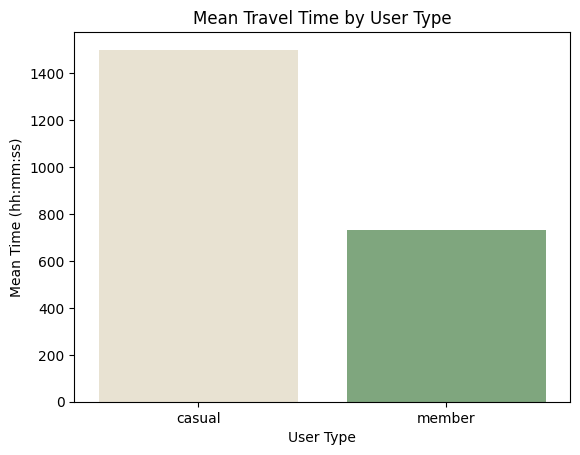

In [18]:
# Plot Mean travel time by User type
mean_time_plot = sns.barplot(x='member_casual', y='mean_time', data=user_type_means, palette={'casual': '#ECE3CE', 'member': '#79AC78'})
mean_time_plot.set(title='Mean Travel Time by User Type', xlabel='User Type', ylabel='Mean Time (hh:mm:ss)')
plt.show()

#### Mean Travel Distance by User Type

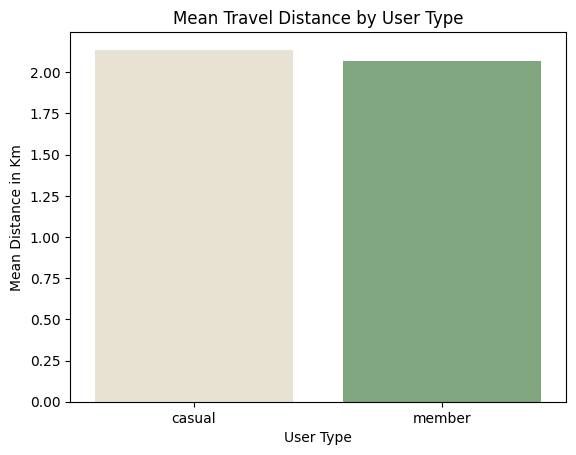

In [19]:
# Plot Mean travel distance by User type
mean_distance_plot = sns.barplot(x='member_casual', y='mean_distance', data=user_type_means, palette={'casual': '#ECE3CE', 'member': '#79AC78'})
mean_distance_plot.set(title='Mean Travel Distance by User Type', xlabel='User Type', ylabel='Mean Distance in Km')
plt.show()

#### Number of Rides by Weekday and User Type

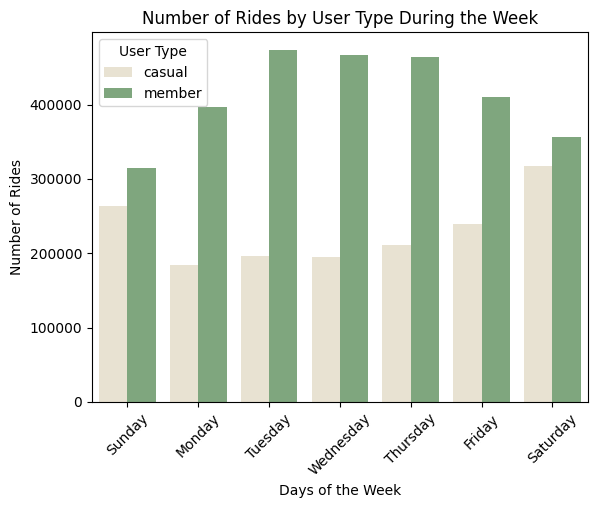

In [20]:
# Check the number of rides differences by weekday
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

rides_by_weekday = (
    tripdata.assign(weekday=tripdata['started_at'].dt.strftime('%A'))
    .groupby(['member_casual', 'weekday'])
    .agg(
        number_of_rides=('ride_length', 'count'), 
        average_duration=('ride_length', lambda x: x.mean().total_seconds())
    )
    .reset_index()
    .sort_values(by=['member_casual', 'weekday'], ascending=[True, True])
)

# Plot Number of rides by User type during the week
rides_by_weekday_plot = sns.barplot(x='weekday', y='number_of_rides', hue='member_casual', data=rides_by_weekday, order=weekday_order, palette={'casual': '#ECE3CE', 'member': '#79AC78'})
rides_by_weekday_plot.set(title='Number of Rides by User Type During the Week', xlabel='Days of the Week', ylabel='Number of Rides')
rides_by_weekday_plot.legend(title='User Type')
rides_by_weekday_plot.set_xticklabels(rides_by_weekday_plot.get_xticklabels(), rotation=45)
plt.show()

#### Insights
**Observation**
<br>
Upon analyzing the data, it appears that casual users cover approximately the same average distance as member users. However, casual users tend to have significantly longer rides, suggesting a more leisure-oriented usage compared to the annual members. This distinction may signify a contrast between the pragmatic, public transport-like use of bikes by annual members and the more recreational use by casual users.

**Reinforcement of Idea**
<br>
The observation is further reinforced by the consistent and stable usage pattern of the service by annual members throughout the week. In contrast, casual users exhibit a more pronounced weekend-centric usage, implying a preference for weekend recreational activities.

<br>
These insights provide valuable understanding into the distinct behavioral patterns of casual and annual member users, which can inform targeted marketing strategies and service enhancements.

#### Bike Type Usage by User Type
Analyze and visualize the usage of different bike types (classic bikes and electric bikes) based on user types (casual and annual members).

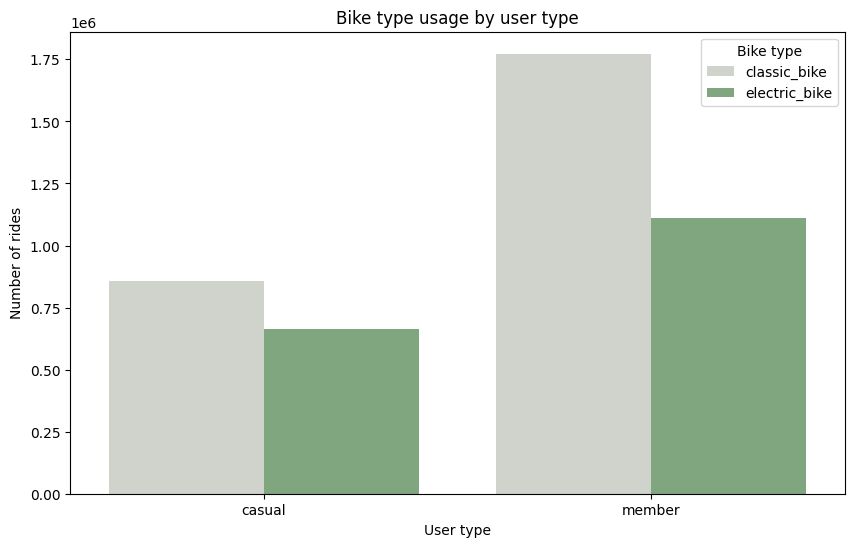

In [21]:
bike_type = tripdata[tripdata['rideable_type'].isin(['classic_bike', 'electric_bike'])]

bike_type_by_user = bike_type.groupby(['member_casual', 'rideable_type']).size().reset_index(name='ride_counts')

plt.figure(figsize=(10, 6))
bike_type_plot = sns.barplot(x='member_casual', y='ride_counts', hue='rideable_type', data=bike_type_by_user, palette={'classic_bike': '#D0D4CA', 'electric_bike': '#79AC78'})
bike_type_plot.set(title='Bike type usage by user type', xlabel='User type', ylabel='Number of rides')
plt.legend(title='Bike type', loc='upper right')
plt.show()

#### Bike Type Usage by User Type During a Week
Analyze and visualize the usage of different bike types (classic bikes and electric bikes) based on user types (casual and annual members) during each day of the week.

<Figure size 1400x800 with 0 Axes>

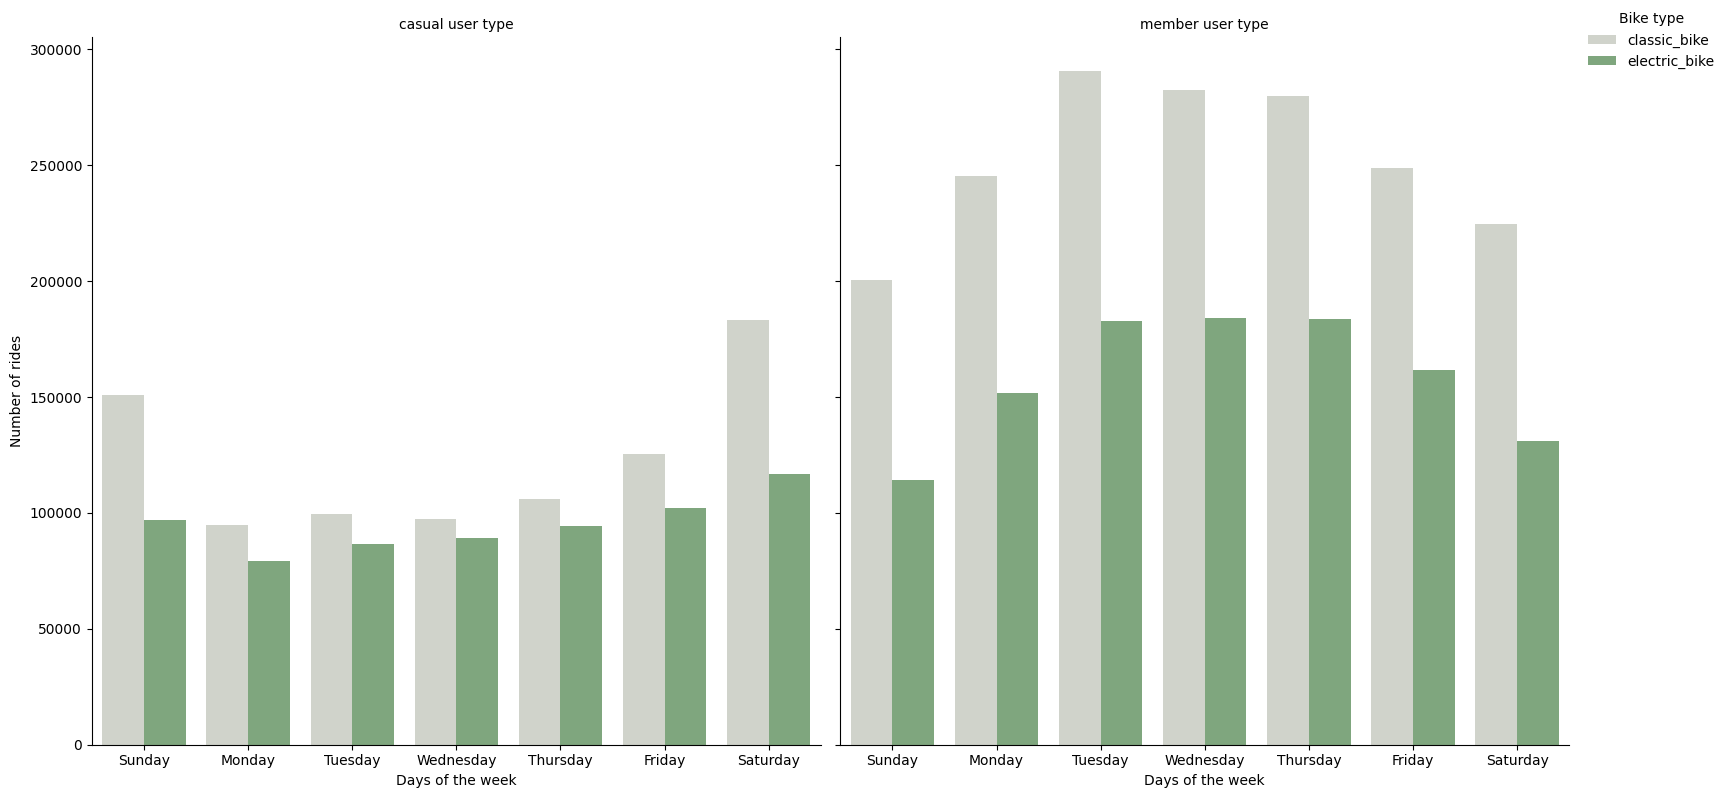

In [22]:
# Check bike type usage by user type during a week
bike_type_by_user_weekday = bike_type.groupby(['member_casual', 'rideable_type', 'day']).size().reset_index(name='ride_counts')

# Plot Bike type usage by user type during a week
plt.figure(figsize=(14, 8))
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

g = sns.FacetGrid(bike_type_by_user_weekday, col="member_casual", height=8, aspect=1, col_wrap=2)
g.map_dataframe(
    sns.barplot, 
    x='day', 
    y='ride_counts', 
    hue='rideable_type', 
    order=weekday_order,
    palette={'classic_bike': '#D0D4CA', 'electric_bike': '#79AC78'}
)
g.set_axis_labels("Days of the week", "Number of rides")
g.set_titles(col_template="{col_name} user type")
g.add_legend(title='Bike type', loc='upper right')
plt.show()

Here we can see that the annual members use both types of bikes for their rides, but the casual users show a clear preference for the classic bikes.

#### Visualizing Popular Bike Routes in Chicago
Utilising the geopandas and folium libraries to create an interactive map visualizing the most popular bike routes in Chicago. The HeatMap layer is employed to highlight areas with a high concentration of bike rides.

In [23]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point

# Create a DataFrame only for the most popular routes (>250 times)
coordinates_table = tripdata[(tripdata['start_lng'] != tripdata['end_lng']) & (tripdata['start_lat'] != tripdata['end_lat'])]
coordinates_table = coordinates_table.groupby(['start_lng', 'start_lat', 'end_lng', 'end_lat', 'member_casual', 'rideable_type']).size().reset_index(name='total')
coordinates_table = coordinates_table[coordinates_table['total'] > 250]

# Store bounding box coordinates for Chicago
chi_bb = {
    'left': -87.700424,
    'bottom': 41.790769,
    'right': -87.554855,
    'top': 41.990119
}

# Create a GeoDataFrame for the most popular routes
geometry = [Point(xy) for xy in zip(coordinates_table['start_lng'], coordinates_table['start_lat'])]
geo_df = gpd.GeoDataFrame(coordinates_table, geometry=geometry)

# Filter GeoDataFrame by bounding box
geo_df = geo_df.cx[chi_bb['left']:chi_bb['right'], chi_bb['bottom']:chi_bb['top']]

# Create a folium map centered around Chicago
m = folium.Map(location=[geo_df['start_lat'].mean(), geo_df['start_lng'].mean()], zoom_start=12, control_scale=True)

# Add a HeatMap layer to the folium map
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]
HeatMap(heat_data).add_to(m)

# Display the map in the notebook
display(m)

#### Casual Type Users

In [24]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point

# Create a DataFrame only for the most popular routes (>250 times)
coordinates_table = tripdata[(tripdata['start_lng'] != tripdata['end_lng']) & (tripdata['start_lat'] != tripdata['end_lat'])]
coordinates_table = coordinates_table.groupby(['start_lng', 'start_lat', 'end_lng', 'end_lat', 'member_casual', 'rideable_type']).size().reset_index(name='total')
coordinates_table = coordinates_table[coordinates_table['total'] > 250]

# Store bounding box coordinates for Chicago
chi_bb = {
    'left': -87.700424,
    'bottom': 41.790769,
    'right': -87.554855,
    'top': 41.990119
}

# Create separate GeoDataFrames for casual and member
geo_df_casual = gpd.GeoDataFrame(coordinates_table[coordinates_table['member_casual'] == 'casual'], 
                                 geometry=gpd.points_from_xy(coordinates_table[coordinates_table['member_casual'] == 'casual']['start_lng'],
                                                            coordinates_table[coordinates_table['member_casual'] == 'casual']['start_lat']))
geo_df_member = gpd.GeoDataFrame(coordinates_table[coordinates_table['member_casual'] == 'member'],
                                 geometry=gpd.points_from_xy(coordinates_table[coordinates_table['member_casual'] == 'member']['start_lng'],
                                                            coordinates_table[coordinates_table['member_casual'] == 'member']['start_lat']))

# Filter GeoDataFrames by bounding box
geo_df_casual = geo_df_casual.cx[chi_bb['left']:chi_bb['right'], chi_bb['bottom']:chi_bb['top']]
geo_df_member = geo_df_member.cx[chi_bb['left']:chi_bb['right'], chi_bb['bottom']:chi_bb['top']]

# Create a folium map centered around Chicago
m_casual = folium.Map(location=[geo_df_casual['geometry'].centroid.y.mean(), geo_df_casual['geometry'].centroid.x.mean()], zoom_start=12, control_scale=True)
m_member = folium.Map(location=[geo_df_member['geometry'].centroid.y.mean(), geo_df_member['geometry'].centroid.x.mean()], zoom_start=12, control_scale=True)

# Add HeatMap layers to the folium maps
heat_data_casual = [[point.xy[1][0], point.xy[0][0]] for point in geo_df_casual.geometry]
heat_data_member = [[point.xy[1][0], point.xy[0][0]] for point in geo_df_member.geometry]

HeatMap(heat_data_casual).add_to(m_casual)
HeatMap(heat_data_member).add_to(m_member)

# Display the maps in the notebook
display(m_casual)


#### Member Type Users

In [25]:
display(m_member)

#### Spatial Analysis and User Behavior Insights
The spatial analysis of the coordinates data reveals intriguing patterns in user behavior. Casual users tend to concentrate around the center of the town, with their trips predominantly located in this area. This observation aligns with the notion that casual users engage in more relaxed, leisurely rides. On weekends, their rides may also be influenced by tourism or sightseeing, focusing on the downtown area where various points of interest are situated.

In stark contrast, annual users exhibit a more extensive range, connecting the downtown with the outskirts of the city. This suggests that annual users are likely individuals residing outside the downtown area who utilize the bike-sharing service for daily commuting to their workplaces in the city.

These spatial insights provide valuable context for tailoring marketing strategies and service enhancements to cater to the distinct needs and preferences of casual and annual member users.

## Conclusions and Recommendations

#### Conclusions
Considering the overarching business task—determining factors that could motivate casual users to transition to an annual subscription based on their behavior—several key insights have emerged from our analysis:

1. **Casual User Behavior:**
   - Casual users predominantly engage in leisure and tourism rides, especially on weekends.
   - The preference for classic bikes is notable among casual users.

2. **Annual User Behavior:**
   - Annual users primarily undertake pragmatic rides, including commuting, throughout the week.
   - Both electric and classic bikes are utilized by annual users.

#### Recommendations
Based on these insights, the following recommendations are proposed for the marketing team:

1. **Targeted Messaging:**
   - Tailor marketing messages to highlight the leisure and tourism aspects of the service, especially on weekends.
   - Emphasize the convenience of electric bikes for leisure rides.

2. **Promotions:**
   - Consider offering promotions or discounts specifically tied to weekends or electric bike usage to entice casual users.

By aligning marketing strategies with the identified user behaviors, the goal of encouraging casual users to transition to an annual subscription can be approached strategically.
